<a href="https://colab.research.google.com/github/MhdKian/Metasurface-Inverse-Design/blob/main/Tunable_Metasurface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from tqdm import tqdm
from matplotlib import pyplot
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Unziping the input of the network (scattering parameter images)
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/X, First Network.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [6]:
# Loading the output of the network (pixelated unit cells)
y = read_csv('y.csv', header=None).astype('int').T
print(y.shape)
y.head()

(5640, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1,0,1,0,1,1,1,1,0,1,...,0,0,1,1,1,0,0,1,0,0
1,0,0,0,0,0,1,1,1,1,1,...,1,0,0,1,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
3,1,0,0,1,0,1,1,1,1,1,...,1,1,1,1,0,1,0,0,0,1
4,1,1,1,0,1,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1


100%|██████████| 5640/5640 [00:04<00:00, 1208.78it/s]


(5640, 150, 150, 3)


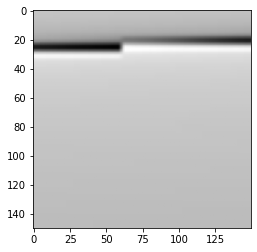

In [7]:
# Converting images in the zip file to NumPy arrays
train_image = []
for i in tqdm(range(y.shape[0])):
    img = image.load_img('/tmp/'f"{i+1}" + '.png', target_size=(150,150,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
print(X.shape)
plt.imshow(X[6])


In [8]:
# Train_Test_Split 

train_dim = 5000
X_train = X[0:train_dim,:,:,:]
X_test = X[train_dim:,:,:,:]
X_test.shape


y1_train = y.iloc[0:train_dim,0:1]
y2_train = y.iloc[0:train_dim,1:2]
y3_train = y.iloc[0:train_dim,2:3]
y4_train = y.iloc[0:train_dim,3:4]
y5_train = y.iloc[0:train_dim,4:5]
y6_train = y.iloc[0:train_dim,5:6]
y7_train = y.iloc[0:train_dim,6:7]
y8_train = y.iloc[0:train_dim,7:8]
y9_train = y.iloc[0:train_dim,8:9]
y10_train = y.iloc[0:train_dim,9:10]
y11_train = y.iloc[0:train_dim,10:11]
y12_train = y.iloc[0:train_dim,11:12]
y13_train = y.iloc[0:train_dim,12:13]
y14_train = y.iloc[0:train_dim,13:14]
y15_train = y.iloc[0:train_dim,14:15]
y16_train = y.iloc[0:train_dim,15:16]
y17_train = y.iloc[0:train_dim,16:17]
y18_train = y.iloc[0:train_dim,17:18]
y19_train = y.iloc[0:train_dim,18:19]
y20_train = y.iloc[0:train_dim,19:20]
y21_train = y.iloc[0:train_dim,20:21]
y22_train = y.iloc[0:train_dim,21:22]
y23_train = y.iloc[0:train_dim,22:23]
y24_train = y.iloc[0:train_dim,23:24]
y25_train = y.iloc[0:train_dim,24:25]
y26_train = y.iloc[0:train_dim,25:26]
y27_train = y.iloc[0:train_dim,26:27]
y28_train = y.iloc[0:train_dim,27:28]
y29_train = y.iloc[0:train_dim,28:29]
y30_train = y.iloc[0:train_dim,29:30]
y31_train = y.iloc[0:train_dim,30:31]
y32_train = y.iloc[0:train_dim,31:32]
y33_train = y.iloc[0:train_dim,32:33]
y34_train = y.iloc[0:train_dim,33:34]
y35_train = y.iloc[0:train_dim,34:35]
y36_train = y.iloc[0:train_dim,35:36]
y37_train = y.iloc[0:train_dim,36:37]
y38_train = y.iloc[0:train_dim,37:38]
y39_train = y.iloc[0:train_dim,38:39]
y40_train = y.iloc[0:train_dim,39:40]
y41_train = y.iloc[0:train_dim,40:41]
y42_train = y.iloc[0:train_dim,41:42]
y43_train = y.iloc[0:train_dim,42:43]
y44_train = y.iloc[0:train_dim,43:44]
y45_train = y.iloc[0:train_dim,44:45]
y46_train = y.iloc[0:train_dim,45:46]
y47_train = y.iloc[0:train_dim,46:47]
y48_train = y.iloc[0:train_dim,47:48]
y49_train = y.iloc[0:train_dim,48:49]
y50_train = y.iloc[0:train_dim,49:50]
y51_train = y.iloc[0:train_dim,50:51]
y52_train = y.iloc[0:train_dim,51:52]
y53_train = y.iloc[0:train_dim,52:53]
y54_train = y.iloc[0:train_dim,53:54]
y55_train = y.iloc[0:train_dim,54:55]
y56_train = y.iloc[0:train_dim,55:56]
y57_train = y.iloc[0:train_dim,56:57]
y58_train = y.iloc[0:train_dim,57:58]
y59_train = y.iloc[0:train_dim,58:59]
y60_train = y.iloc[0:train_dim,59:60]
y61_train = y.iloc[0:train_dim,60:61]
y62_train = y.iloc[0:train_dim,61:62]
y63_train = y.iloc[0:train_dim,62:63]
y64_train = y.iloc[0:train_dim,63:64]



y1_test = y.iloc[train_dim:,0:1]
y2_test = y.iloc[train_dim:,1:2]
y3_test = y.iloc[train_dim:,2:3]
y4_test = y.iloc[train_dim:,3:4]
y5_test = y.iloc[train_dim:,4:5]
y6_test = y.iloc[train_dim:,5:6]
y7_test = y.iloc[train_dim:,6:7]
y8_test = y.iloc[train_dim:,7:8]
y9_test = y.iloc[train_dim:,8:9]
y10_test = y.iloc[train_dim:,9:10]
y11_test = y.iloc[train_dim:,10:11]
y12_test = y.iloc[train_dim:,11:12]
y13_test = y.iloc[train_dim:,12:13]
y14_test = y.iloc[train_dim:,13:14]
y15_test = y.iloc[train_dim:,14:15]
y16_test = y.iloc[train_dim:,15:16]
y17_test = y.iloc[train_dim:,16:17]
y18_test = y.iloc[train_dim:,17:18]
y19_test = y.iloc[train_dim:,18:19]
y20_test = y.iloc[train_dim:,19:20]
y21_test = y.iloc[train_dim:,20:21]
y22_test = y.iloc[train_dim:,21:22]
y23_test = y.iloc[train_dim:,22:23]
y24_test = y.iloc[train_dim:,23:24]
y25_test = y.iloc[train_dim:,24:25]
y26_test = y.iloc[train_dim:,25:26]
y27_test = y.iloc[train_dim:,26:27]
y28_test = y.iloc[train_dim:,27:28]
y29_test = y.iloc[train_dim:,28:29]
y30_test = y.iloc[train_dim:,29:30]
y31_test = y.iloc[train_dim:,30:31]
y32_test = y.iloc[train_dim:,31:32]
y33_test = y.iloc[train_dim:,32:33]
y34_test = y.iloc[train_dim:,33:34]
y35_test = y.iloc[train_dim:,34:35]
y36_test = y.iloc[train_dim:,35:36]
y37_test = y.iloc[train_dim:,36:37]
y38_test = y.iloc[train_dim:,37:38]
y39_test = y.iloc[train_dim:,38:39]
y40_test = y.iloc[train_dim:,39:40]
y41_test = y.iloc[train_dim:,40:41]
y42_test = y.iloc[train_dim:,41:42]
y43_test = y.iloc[train_dim:,42:43]
y44_test = y.iloc[train_dim:,43:44]
y45_test = y.iloc[train_dim:,44:45]
y46_test = y.iloc[train_dim:,45:46]
y47_test = y.iloc[train_dim:,46:47]
y48_test = y.iloc[train_dim:,47:48]
y49_test = y.iloc[train_dim:,48:49]
y50_test = y.iloc[train_dim:,49:50]
y51_test = y.iloc[train_dim:,50:51]
y52_test = y.iloc[train_dim:,51:52]
y53_test = y.iloc[train_dim:,52:53]
y54_test = y.iloc[train_dim:,53:54]
y55_test = y.iloc[train_dim:,54:55]
y56_test = y.iloc[train_dim:,55:56]
y57_test = y.iloc[train_dim:,56:57]
y58_test = y.iloc[train_dim:,57:58]
y59_test = y.iloc[train_dim:,58:59]
y60_test = y.iloc[train_dim:,59:60]
y61_test = y.iloc[train_dim:,60:61]
y62_test = y.iloc[train_dim:,61:62]
y63_test = y.iloc[train_dim:,62:63]
y64_test = y.iloc[train_dim:,63:64]

print(X_train.shape)
print(y64_train.shape)

(5000, 150, 150, 3)
(5000, 1)


In [9]:
# Download the inception v3 weights

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Print the model summary
#pre_trained_model.summary()

--2022-06-05 18:49:55--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 74.125.20.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   271MB/s    in 0.3s    

2022-06-05 18:49:56 (271 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [19]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)


#Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x) 
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x) 
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)     
# Add a fully connected layer with 128 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x) 
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)              
# Add a final sigmoid layer for classification

y1_out = layers.Dense  (1, activation='sigmoid')(x)           
y2_out = layers.Dense  (1, activation='sigmoid')(x) 
y3_out = layers.Dense  (1, activation='sigmoid')(x) 
y4_out = layers.Dense  (1, activation='sigmoid')(x) 
y5_out = layers.Dense  (1, activation='sigmoid')(x)           
y6_out = layers.Dense  (1, activation='sigmoid')(x) 
y7_out = layers.Dense  (1, activation='sigmoid')(x) 
y8_out = layers.Dense  (1, activation='sigmoid')(x) 
y9_out = layers.Dense  (1, activation='sigmoid')(x)           
y10_out = layers.Dense  (1, activation='sigmoid')(x) 
y11_out = layers.Dense  (1, activation='sigmoid')(x) 
y12_out = layers.Dense  (1, activation='sigmoid')(x) 
y13_out = layers.Dense  (1, activation='sigmoid')(x)           
y14_out = layers.Dense  (1, activation='sigmoid')(x) 
y15_out = layers.Dense  (1, activation='sigmoid')(x) 
y16_out = layers.Dense  (1, activation='sigmoid')(x) 
y17_out = layers.Dense  (1, activation='sigmoid')(x)           
y18_out = layers.Dense  (1, activation='sigmoid')(x) 
y19_out = layers.Dense  (1, activation='sigmoid')(x) 
y20_out = layers.Dense  (1, activation='sigmoid')(x) 
y21_out = layers.Dense  (1, activation='sigmoid')(x)           
y22_out = layers.Dense  (1, activation='sigmoid')(x) 
y23_out = layers.Dense  (1, activation='sigmoid')(x) 
y24_out = layers.Dense  (1, activation='sigmoid')(x) 
y25_out = layers.Dense  (1, activation='sigmoid')(x)           
y26_out = layers.Dense  (1, activation='sigmoid')(x) 
y27_out = layers.Dense  (1, activation='sigmoid')(x) 
y28_out = layers.Dense  (1, activation='sigmoid')(x) 
y29_out = layers.Dense  (1, activation='sigmoid')(x)           
y30_out = layers.Dense  (1, activation='sigmoid')(x) 
y31_out = layers.Dense  (1, activation='sigmoid')(x) 
y32_out = layers.Dense  (1, activation='sigmoid')(x)
y33_out = layers.Dense  (1, activation='sigmoid')(x)           
y34_out = layers.Dense  (1, activation='sigmoid')(x) 
y35_out = layers.Dense  (1, activation='sigmoid')(x) 
y36_out = layers.Dense  (1, activation='sigmoid')(x) 
y37_out = layers.Dense  (1, activation='sigmoid')(x)           
y38_out = layers.Dense  (1, activation='sigmoid')(x) 
y39_out = layers.Dense  (1, activation='sigmoid')(x) 
y40_out = layers.Dense  (1, activation='sigmoid')(x) 
y41_out = layers.Dense  (1, activation='sigmoid')(x)           
y42_out = layers.Dense  (1, activation='sigmoid')(x) 
y43_out = layers.Dense  (1, activation='sigmoid')(x) 
y44_out = layers.Dense  (1, activation='sigmoid')(x) 
y45_out = layers.Dense  (1, activation='sigmoid')(x)           
y46_out = layers.Dense  (1, activation='sigmoid')(x) 
y47_out = layers.Dense  (1, activation='sigmoid')(x) 
y48_out = layers.Dense  (1, activation='sigmoid')(x) 
y49_out = layers.Dense  (1, activation='sigmoid')(x)           
y50_out = layers.Dense  (1, activation='sigmoid')(x) 
y51_out = layers.Dense  (1, activation='sigmoid')(x) 
y52_out = layers.Dense  (1, activation='sigmoid')(x) 
y53_out = layers.Dense  (1, activation='sigmoid')(x)           
y54_out = layers.Dense  (1, activation='sigmoid')(x) 
y55_out = layers.Dense  (1, activation='sigmoid')(x) 
y56_out = layers.Dense  (1, activation='sigmoid')(x) 
y57_out = layers.Dense  (1, activation='sigmoid')(x)           
y58_out = layers.Dense  (1, activation='sigmoid')(x) 
y59_out = layers.Dense  (1, activation='sigmoid')(x) 
y60_out = layers.Dense  (1, activation='sigmoid')(x) 
y61_out = layers.Dense  (1, activation='sigmoid')(x)           
y62_out = layers.Dense  (1, activation='sigmoid')(x) 
y63_out = layers.Dense  (1, activation='sigmoid')(x) 
y64_out = layers.Dense  (1, activation='sigmoid')(x)

model = Model( pre_trained_model.input, [y1_out, y2_out, y3_out, y4_out, y5_out, y6_out, y7_out, y8_out, y9_out, y10_out, y11_out, y12_out, y13_out, y14_out, y15_out, y16_out, y17_out, y18_out, y19_out, y20_out, y21_out, y22_out, y23_out, y24_out, y25_out, y26_out, y27_out, y28_out, y29_out, y30_out, y31_out, y32_out, y33_out, y34_out, y35_out, y36_out, y37_out, y38_out, y39_out, y40_out, y41_out, y42_out, y43_out, y44_out, y45_out, y46_out, y47_out, y48_out, y49_out, y50_out, y51_out, y52_out, y53_out, y54_out, y55_out, y56_out, y57_out, y58_out, y59_out, y60_out, y61_out, y62_out, y63_out, y64_out]) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = ['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'], 
              metrics = ['acc'])

model.summary()

In [ ]:
# Training the model

epochs_No = 1000

y_train = [y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train, y10_train, y11_train, y12_train, y13_train, y14_train, y15_train, y16_train, y17_train, y18_train, y19_train, y20_train, y21_train, y22_train, y23_train, y24_train, y25_train, y26_train, y27_train, y28_train, y29_train, y30_train, y31_train, y32_train, y33_train, y34_train, y35_train, y36_train, y37_train, y38_train, y39_train, y40_train, y41_train, y42_train, y43_train, y44_train, y45_train, y46_train, y47_train, y48_train, y49_train, y50_train, y51_train, y52_train, y53_train, y54_train, y55_train, y56_train, y57_train, y58_train, y59_train, y60_train, y61_train, y62_train, y63_train, y64_train]
y_test = [y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test, y12_test, y13_test, y14_test, y15_test, y16_test, y17_test, y18_test, y19_test, y20_test, y21_test, y22_test, y23_test, y24_test, y25_test, y26_test, y27_test, y28_test, y29_test, y30_test, y31_test, y32_test, y33_test, y34_test, y35_test, y36_test, y37_test, y38_test, y39_test, y40_test, y41_test, y42_test, y43_test, y44_test, y45_test, y46_test, y47_test, y48_test, y49_test, y50_test, y51_test, y52_test, y53_test, y54_test, y55_test, y56_test, y57_test, y58_test, y59_test, y60_test, y61_test, y62_test, y63_test, y64_test]

history = model.fit(X_train, y_train, epochs = epochs_No, validation_data=(X_test, y_test), batch_size=64)

loss_train = history.history['dense_1_loss']
loss_val = history.history['dense_1_acc']
epochs = range(0, epochs_No)
plt.plot(epochs, loss_train, 'g', label = 'dense_1_acc')
plt.plot(epochs, loss_val, 'b', label = 'dense_1_loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()
print(loss_train)
model.save('Net1.h5')

In [ ]:
model.save('/content/drive/MyDrive/Net1.h5')